# 

In [1]:
import requests
import pandas as pd
from urllib.parse import urlparse
import numpy as np
from bs4 import BeautifulSoup
import nltk.data
from requests_html import HTMLSession
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from transformers import pipeline
import matplotlib.pyplot as plt


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\frco_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
url = 'http://books.toscrape.com/catalogue/page-1.html'

In [3]:
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
# Find the book titles from page #1
book_titlesp1 = soup.find_all('h3')
for titlep1 in book_titlesp1:
    print(titlep1.text.strip())

A Light in the ...
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History ...
The Requiem Red
The Dirty Little Secrets ...
The Coming Woman: A ...
The Boys in the ...
The Black Maria
Starving Hearts (Triangular Trade ...
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little ...
Rip it Up and ...
Our Band Could Be ...
Olio
Mesaerion: The Best Science ...
Libertarianism for Beginners
It's Only the Himalayas


In [6]:
# Find the book prices from page #1
book_pricesp1 = soup.find_all('p',class_='price_color')
for pricep1 in book_pricesp1:
    print(pricep1.text.strip())

£51.77
£53.74
£50.10
£47.82
£54.23
£22.65
£33.34
£17.93
£22.60
£52.15
£13.99
£20.66
£17.46
£52.29
£35.02
£57.25
£23.88
£37.59
£51.33
£45.17


In [7]:
#Create table with titles and prices of books of 50 pages

# Create lists to store book data
book_titles = []
book_prices = []

# Loop through all 50 pages
for page in range(1, 51):
    url = f'http://books.toscrape.com/catalogue/page-{page}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract book titles
    titles = soup.find_all('h3')
    for title in titles:
        book_titles.append(title.text.strip())

    # Extract book prices
    prices = soup.find_all('p', class_='price_color')
    for price in prices:
        book_prices.append(price.text.strip())

# DataFrame
data = {'Title': book_titles, 'Price': book_prices}
df = pd.DataFrame(data)

# print table
print(df)


                                Title   Price
0                  A Light in the ...  £51.77
1                  Tipping the Velvet  £53.74
2                          Soumission  £50.10
3                       Sharp Objects  £47.82
4        Sapiens: A Brief History ...  £54.23
..                                ...     ...
995  Alice in Wonderland (Alice's ...  £55.53
996    Ajin: Demi-Human, Volume 1 ...  £57.06
997         A Spy's Devotion (The ...  £16.97
998           1st to Die (Women's ...  £53.98
999           1,000 Places to See ...  £26.08

[1000 rows x 2 columns]


In [8]:
# Perform sentiment analysis for each book title
sia = SentimentIntensityAnalyzer()
for title in book_titles:
    sentiment_scores = sia.polarity_scores(title)
    print(f"Titulo: {title}")
    print(f"Sentiment: {sentiment_scores['compound']}")
    print("---")


Titulo: A Light in the ...
Sentiment: 0.0
---
Titulo: Tipping the Velvet
Sentiment: 0.0
---
Titulo: Soumission
Sentiment: 0.0
---
Titulo: Sharp Objects
Sentiment: 0.0
---
Titulo: Sapiens: A Brief History ...
Sentiment: 0.0
---
Titulo: The Requiem Red
Sentiment: 0.0
---
Titulo: The Dirty Little Secrets ...
Sentiment: -0.4404
---
Titulo: The Coming Woman: A ...
Sentiment: 0.0
---
Titulo: The Boys in the ...
Sentiment: 0.0
---
Titulo: The Black Maria
Sentiment: 0.0
---
Titulo: Starving Hearts (Triangular Trade ...
Sentiment: -0.4215
---
Titulo: Shakespeare's Sonnets
Sentiment: 0.0
---
Titulo: Set Me Free
Sentiment: 0.5106
---
Titulo: Scott Pilgrim's Precious Little ...
Sentiment: 0.5719
---
Titulo: Rip it Up and ...
Sentiment: 0.0
---
Titulo: Our Band Could Be ...
Sentiment: 0.0
---
Titulo: Olio
Sentiment: 0.0
---
Titulo: Mesaerion: The Best Science ...
Sentiment: 0.6369
---
Titulo: Libertarianism for Beginners
Sentiment: 0.1027
---
Titulo: It's Only the Himalayas
Sentiment: 0.0
---
Titul

In [9]:
pipe = pipeline("text-classification", model="jonaskoenig/topic_classification_04")

# Sort the sentiment of book titles
for title in book_titles:
    sentiment = pipe(title)[0]['label']
    print(f"Título: {title}")
    print(f"Sentimiento: {sentiment}")
    print("---")


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at jonaskoenig/topic_classification_04.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Título: A Light in the ...
Sentimiento: Entertainment & Music
---
Título: Tipping the Velvet
Sentimiento: Entertainment & Music
---
Título: Soumission
Sentimiento: Education & Reference
---
Título: Sharp Objects
Sentimiento: Education & Reference
---
Título: Sapiens: A Brief History ...
Sentimiento: Science & Mathematics
---
Título: The Requiem Red
Sentimiento: Entertainment & Music
---
Título: The Dirty Little Secrets ...
Sentimiento: Entertainment & Music
---
Título: The Coming Woman: A ...
Sentimiento: Entertainment & Music
---
Título: The Boys in the ...
Sentimiento: Entertainment & Music
---
Título: The Black Maria
Sentimiento: Sports
---
Título: Starving Hearts (Triangular Trade ...
Sentimiento: Education & Reference
---
Título: Shakespeare's Sonnets
Sentimiento: Education & Reference
---
Título: Set Me Free
Sentimiento: Computers & Internet
---
Título: Scott Pilgrim's Precious Little ...
Sentimiento: Entertainment & Music
---
Título: Rip it Up and ...
Sentimiento: Computers & In

Título: Bossypants
Sentimiento: Science & Mathematics
---
Título: Bitch Planet, Vol. 1: ...
Sentimiento: Entertainment & Music
---
Título: Avatar: The Last Airbender: ...
Sentimiento: Entertainment & Music
---
Título: Algorithms to Live By: ...
Sentimiento: Computers & Internet
---
Título: A World of Flavor: ...
Sentimiento: Entertainment & Music
---
Título: A Piece of Sky, ...
Sentimiento: Entertainment & Music
---
Título: A Murder in Time
Sentimiento: Politics & Government
---
Título: A Flight of Arrows ...
Sentimiento: Entertainment & Music
---
Título: A Fierce and Subtle ...
Sentimiento: Education & Reference
---
Título: A Court of Thorns ...
Sentimiento: Entertainment & Music
---
Título: (Un)Qualified: How God Uses ...
Sentimiento: Society & Culture
---
Título: You Are What You ...
Sentimiento: Family & Relationships
---
Título: William Shakespeare's Star Wars: ...
Sentimiento: Education & Reference
---
Título: Tuesday Nights in 1980
Sentimiento: Entertainment & Music
---
Título: 

Título: The Star-Touched Queen
Sentimiento: Entertainment & Music
---
Título: The Songs of the ...
Sentimiento: Entertainment & Music
---
Título: The Song of Achilles
Sentimiento: Entertainment & Music
---
Título: The Rosie Project (Don ...
Sentimiento: Entertainment & Music
---
Título: The Power of Habit: ...
Sentimiento: Society & Culture
---
Título: The Marriage of Opposites
Sentimiento: Entertainment & Music
---
Título: The Lucifer Effect: Understanding ...
Sentimiento: Society & Culture
---
Título: The Long Haul (Diary ...
Sentimiento: Entertainment & Music
---
Título: The Loney
Sentimiento: Entertainment & Music
---
Título: The Literature Book (Big ...
Sentimiento: Education & Reference
---
Título: The Last Mile (Amos ...
Sentimiento: Entertainment & Music
---
Título: The Immortal Life of ...
Sentimiento: Entertainment & Music
---
Título: The Hidden Oracle (The ...
Sentimiento: Entertainment & Music
---
Título: The Help Yourself Cookbook ...
Sentimiento: Business & Finance
---
Tí

Título: Tipping Point for Planet ...
Sentimiento: Society & Culture
---
Título: The Star-Touched Queen
Sentimiento: Entertainment & Music
---
Título: The Silent Sister (Riley ...
Sentimiento: Entertainment & Music
---
Título: The Midnight Watch: A ...
Sentimiento: Entertainment & Music
---
Título: The Lonely City: Adventures ...
Sentimiento: Entertainment & Music
---
Título: The Gray Rhino: How ...
Sentimiento: Science & Mathematics
---
Título: The Golden Condom: And ...
Sentimiento: Entertainment & Music
---
Título: The Epidemic (The Program ...
Sentimiento: Entertainment & Music
---
Título: The Dinner Party
Sentimiento: Family & Relationships
---
Título: The Diary of a ...
Sentimiento: Entertainment & Music
---
Título: The Children
Sentimiento: Entertainment & Music
---
Título: Stars Above (The Lunar ...
Sentimiento: Science & Mathematics
---
Título: Snatched: How A Drug ...
Sentimiento: Entertainment & Music
---
Título: Raspberry Pi Electronics Projects ...
Sentimiento: Science & Ma

Título: Howl and Other Poems
Sentimiento: Education & Reference
---
Título: History of Beauty
Sentimiento: Education & Reference
---
Título: Heaven is for Real: ...
Sentimiento: Society & Culture
---
Título: Future Shock (Future Shock ...
Sentimiento: Entertainment & Music
---
Título: Ender's Game (The Ender ...
Sentimiento: Sports
---
Título: Diary of a Citizen ...
Sentimiento: Entertainment & Music
---
Título: Death by Leisure: A ...
Sentimiento: Entertainment & Music
---
Título: Brilliant Beacons: A History ...
Sentimiento: Society & Culture
---
Título: Brazen: The Courage to ...
Sentimiento: Education & Reference
---
Título: Between the World and ...
Sentimiento: Business & Finance
---
Título: Being Mortal: Medicine and ...
Sentimiento: Society & Culture
---
Título: A Murder Over a ...
Sentimiento: Politics & Government
---
Título: 32 Yolks
Sentimiento: Sports
---
Título: "Most Blessed of the ...
Sentimiento: Society & Culture
---
Título: You Are a Badass: ...
Sentimiento: Family &

Título: The Fault in Our ...
Sentimiento: Science & Mathematics
---
Título: The False Prince (The ...
Sentimiento: Entertainment & Music
---
Título: The Expatriates
Sentimiento: Business & Finance
---
Título: The Dream Thieves (The ...
Sentimiento: Entertainment & Music
---
Título: The Darkest Corners
Sentimiento: Science & Mathematics
---
Título: The Crossover
Sentimiento: Entertainment & Music
---
Título: The 5th Wave (The ...
Sentimiento: Entertainment & Music
---
Título: Tell the Wind and ...
Sentimiento: Family & Relationships
---
Título: Tell Me Three Things
Sentimiento: Family & Relationships
---
Título: Talking to Girls About ...
Sentimiento: Family & Relationships
---
Título: Siddhartha
Sentimiento: Education & Reference
---
Título: Shiver (The Wolves of ...
Sentimiento: Education & Reference
---
Título: Remember Me?
Sentimiento: Entertainment & Music
---
Título: Red Dragon (Hannibal Lecter ...
Sentimiento: Entertainment & Music
---
Título: Peak: Secrets from the ...
Sentimien

Título: The Tipping Point: How ...
Sentimiento: Education & Reference
---
Título: The Thing About Jellyfish
Sentimiento: Science & Mathematics
---
Título: The Stand
Sentimiento: Entertainment & Music
---
Título: The Smitten Kitchen Cookbook
Sentimiento: Entertainment & Music
---
Título: The Silkworm (Cormoran Strike ...
Sentimiento: Science & Mathematics
---
Título: The Sandman, Vol. 3: ...
Sentimiento: Entertainment & Music
---
Título: The Rose & the ...
Sentimiento: Entertainment & Music
---
Título: The Road to Little ...
Sentimiento: Entertainment & Music
---
Título: The Rise of Theodore ...
Sentimiento: Education & Reference
---
Título: The Restaurant at the ...
Sentimiento: Family & Relationships
---
Título: The Rest Is Noise: ...
Sentimiento: Science & Mathematics
---
Título: The Red Tent
Sentimiento: Entertainment & Music
---
Título: The Purpose Driven Life: ...
Sentimiento: Society & Culture
---
Título: The Purest Hook (Second ...
Sentimiento: Entertainment & Music
---
Título: 

Título: Gratitude
Sentimiento: Society & Culture
---
Título: Gone Girl
Sentimiento: Entertainment & Music
---
Título: Golden (Heart of Dread ...
Sentimiento: Entertainment & Music
---
Título: Girl in the Blue ...
Sentimiento: Entertainment & Music
---
Título: Fruits Basket, Vol. 3 ...
Sentimiento: Entertainment & Music
---
Título: Friday Night Lights: A ...
Sentimiento: Entertainment & Music
---
Título: Fire Bound (Sea Haven/Sisters ...
Sentimiento: Education & Reference
---
Título: Fifty Shades Freed (Fifty ...
Sentimiento: Entertainment & Music
---
Título: Fellside
Sentimiento: Entertainment & Music
---
Título: Extreme Prey (Lucas Davenport ...
Sentimiento: Entertainment & Music
---
Título: Eragon (The Inheritance Cycle ...
Sentimiento: Science & Mathematics
---
Título: Eclipse (Twilight #3)
Sentimiento: Entertainment & Music
---
Título: Dune (Dune #1)
Sentimiento: Sports
---
Título: Dracula
Sentimiento: Education & Reference
---
Título: Do Androids Dream of ...
Sentimiento: Entertai

Título: Origins (Alphas 0.5)
Sentimiento: Education & Reference
---
Título: One Second (Seven #7)
Sentimiento: Science & Mathematics
---
Título: On the Road (Duluoz ...
Sentimiento: Entertainment & Music
---
Título: Old Records Never Die: ...
Sentimiento: Entertainment & Music
---
Título: Off Sides (Off #1)
Sentimiento: Sports
---
Título: Of Mice and Men
Sentimiento: Education & Reference
---
Título: Myriad (Prentor #1)
Sentimiento: Entertainment & Music
---
Título: My Perfect Mistake (Over ...
Sentimiento: Family & Relationships
---
Título: Ms. Marvel, Vol. 1: ...
Sentimiento: Entertainment & Music
---
Título: Meditations
Sentimiento: Health
---
Título: Matilda
Sentimiento: Entertainment & Music
---
Título: Lost Among the Living
Sentimiento: Entertainment & Music
---
Título: Lord of the Flies
Sentimiento: Entertainment & Music
---
Título: Listen to Me (Fusion ...
Sentimiento: Entertainment & Music
---
Título: Kitchens of the Great ...
Sentimiento: Entertainment & Music
---
Título: Jan

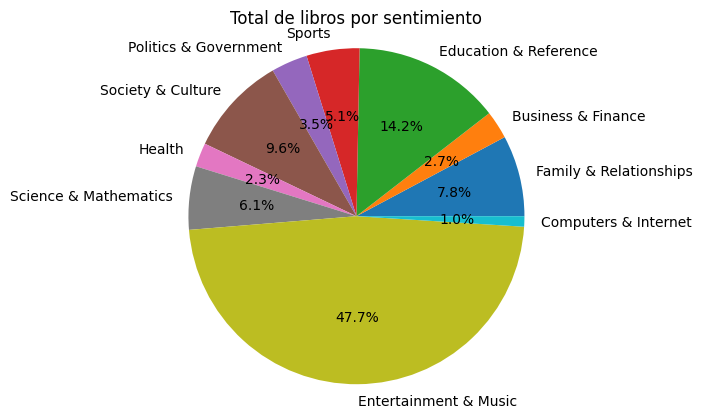

In [11]:
# Sort the sentiment of book titles
sentiments = []
for title in book_titles:
    sentiment = pipe(title)[0]['label']
    sentiments.append(sentiment)

# Count the number of books by feeling
sentiment_counts = {sentiment: sentiments.count(sentiment) for sentiment in set(sentiments)}

# Create and show the pie graph
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Total de libros por sentimiento")
plt.axis('equal')


plt.show()


In [19]:
# Create a dictionary with the sentiment and price of each book
book_data = {'Sentiment': sentiments, 'Price': book_prices}

# Create a DataFrame with the data from the books
import pandas as pd
df = pd.DataFrame(book_data)

# Calculate the correlation between sentiment and price
correlation = df['Sentiment'].astype('category').cat.codes.corr(df['Price'])

# show the result of the correlation
print(f"Correlation between sentiment and price: {correlation}")


Correlation between sentiment and price: 0.29470712588431086
